In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_excel('Online Retail.xlsx')
data.shape

(541909, 8)

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
data["Country"].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [4]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [34]:
data.dropna(subset=["CustomerID"], inplace=True)
data.shape

(406829, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [35]:
data = data[data["Quantity"] > 0]
data = data[data["UnitPrice"] > 0]
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [9]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [37]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]  

In [38]:
latest_date = data["InvoiceDate"].max()

In [39]:
customer_df = data.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (latest_date - x.max()).days,   # Recency
        lambda x: x.nunique()                     # Frequency
    ],
    'InvoiceNo': 'nunique',                       # Number of invoices
    'TotalPrice': 'sum',                          # Monetary
    'StockCode': 'nunique',                       # Product variety
    'Quantity': 'sum',                            # Total items
    'UnitPrice': 'mean'                           # Avg of UnitPrice
})

In [40]:
customer_df.columns = [
    'Recency', 'PurchaseFrequency', 'NumInvoices', 'Monetary',
    'ProductVariety', 'TotalQuantity', 'AvgUnitPrice']

In [14]:
customer_df.columns

Index(['Recency', 'PurchaseFrequency', 'NumInvoices', 'Monetary',
       'ProductVariety', 'TotalQuantity', 'AvgUnitPrice'],
      dtype='object')

In [41]:
customer_df.reset_index(inplace=True)
customer_df.head()

,CustomerID,Recency,PurchaseFrequency,NumInvoices,Monetary,ProductVariety,TotalQuantity,AvgUnitPrice
0,12346.0,325,1,1,77183.60,1,74215,1.040000
1,12347.0,1,7,7,4310.00,103,2458,2.644011
2,12348.0,74,4,4,1797.24,22,2341,5.764839
3,12349.0,18,1,1,1757.55,73,631,8.289041
4,12350.0,309,1,1,334.40,17,197,3.841176


In [ ]:
from sklearn.utils import resample

dfs = [customer_df[customer_df['Cluster'] == i] for i in customer_df['Cluster'].unique()]

# Determine the target size (e.g., match the majority class)
max_size = max(len(df) for df in dfs)

# Upsample each cluster to the same size
upsampled_dfs = [
    resample(df, replace=True, n_samples=max_size, random_state=42) if len(df) < max_size else df
    for df in dfs
]

# Combine back into one DataFrame
customer_df_upsampled = pd.concat(upsampled_dfs).reset_index(drop=True)


In [16]:
customer_df.describe()

,CustomerID,Recency,PurchaseFrequency,NumInvoices,Monetary,ProductVariety,TotalQuantity,AvgUnitPrice
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.250807,4.272015,2054.266460,61.501153,1191.289073,4.467773
std,1721.808492,100.014169,7.635202,7.697998,8989.230441,85.366768,5046.081546,34.211451
min,12346.000000,0.000000,1.000000,1.000000,3.750000,1.000000,1.000000,0.122500
25%,13813.250000,17.000000,1.000000,1.000000,307.415000,16.000000,160.000000,2.203728
50%,15299.500000,50.000000,2.000000,2.000000,674.485000,35.000000,379.000000,2.917611
75%,16778.750000,141.000000,5.000000,5.000000,1661.740000,77.000000,992.750000,3.829784
max,18287.000000,373.000000,210.000000,209.000000,280206.020000,1787.000000,196915.000000,2033.100000


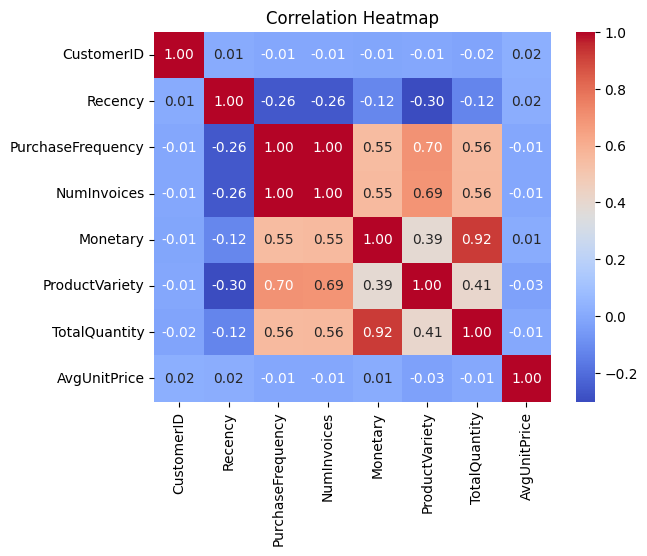

In [17]:
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

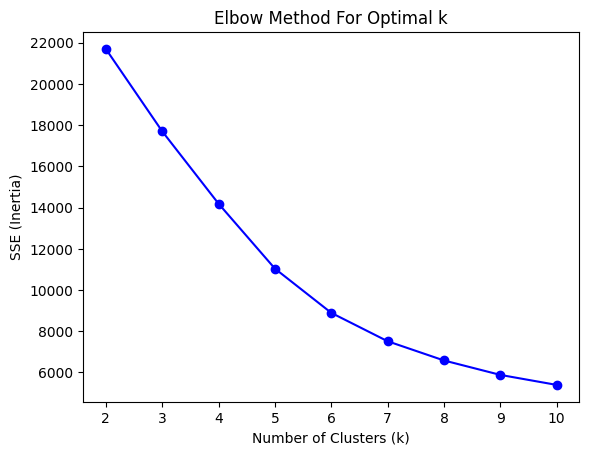

In [18]:
X = customer_df.drop(columns=['CustomerID'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse = []  
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

print(customer_df['Cluster'].value_counts())


Cluster
0    2883
1    1066
4     373
2      15
3       1
Name: count, dtype: int64


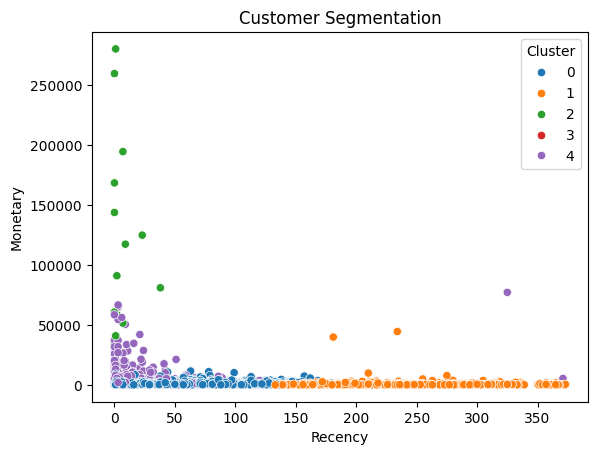

In [20]:
sns.scatterplot(data=customer_df, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation')
plt.show()

In [21]:
silhouette_score(X_scaled, customer_df['Cluster'])

np.float64(0.48941316367239646)

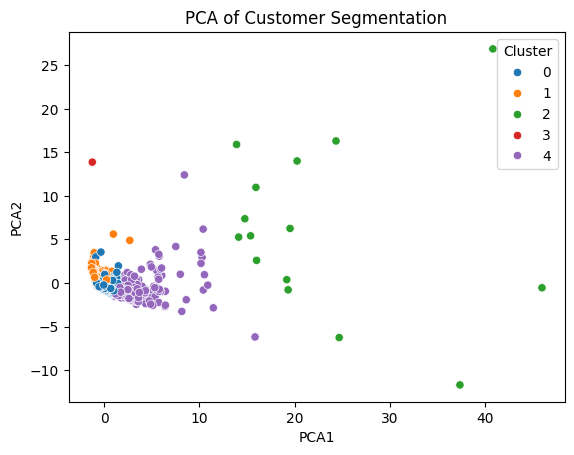

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_df['Cluster']
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('PCA of Customer Segmentation')
plt.show()

In [23]:
cluster_mapping = {
    0: "At-Risk Customers",
    1: "Regular Customers",
    2: "Very High Value Customer",
    3: "Anomaly",
    4: "High Value Customer"
}
customer_df['Cluster'] = customer_df['Cluster'].map(cluster_mapping)

In [24]:
y = customer_df['Cluster']
y.value_counts()

Cluster
At-Risk Customers           2883
Regular Customers           1066
High Value Customer          373
Very High Value Customer      15
Anomaly                        1
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_scaled, y)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

       At-Risk Customers       1.00      1.00      1.00       556
     High Value Customer       1.00      1.00      1.00        80
       Regular Customers       1.00      1.00      1.00       227
Very High Value Customer       1.00      1.00      1.00         5

                accuracy                           1.00       868
               macro avg       1.00      1.00      1.00       868
            weighted avg       1.00      1.00      1.00       868



In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1_weighted')
print("Cross-validated F1 (weighted):", scores.mean())

c:\Users\Thant Thaw Tun\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated F1 (weighted): 0.9845471784107337


In [29]:
test_data = pd.read_excel("test_customer_transactions_by_country.xlsx")
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536413,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,2010-12-20 04:10:00,3.87,12363,United Kingdom,34.83
1,536435,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,7,2011-02-06 18:56:00,3.81,12437,United Kingdom,26.67
2,536404,71053,WHITE METAL LANTERN,8,2011-01-28 07:00:00,1.44,12397,United Kingdom,11.52
3,536377,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,2011-01-31 23:37:00,1.28,12402,United Kingdom,11.52
4,536412,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2011-01-15 21:31:00,3.43,12360,United Kingdom,13.72


In [ ]:
test_data["TotalPrice"].sum()

np.float64(1602.98)

In [31]:
sample_df = data.sample(n=100, random_state=42)
sample_df.to_excel("sampled_data.xlsx", index=False)
print("Sample created and saved as 'sampled_data.xlsx'")


Sample created and saved as 'sampled_data.xlsx'
